<a href="https://colab.research.google.com/github/MahmoodInamdar/Machine-learning-/blob/main/News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Introduction -**

In the world of data we receive plently of data through the internet everyday we came across the different types of news data out of which it is hard to believe which one is real and which one is misinformation which is a big concern in today's time.

The dataset which I am using in this project is collected from different sources such as news articles, news channels, newspaper websites and social media.


**About Data -**

Dataset has different behaviour of news data which includes some news as be fake, some news are to express hate, and some news are published just for fun. Taking all this to the consideration I have created a model with a chat bot which will predict the autheticity of the news which is posted only and analyse the sentiment of the news if it is a positve news, a negative news or a neutral news.

**Dataset -**
www.kaggle.com. (n.d.). Source based Fake News Classification. [online] Available at: https://www.kaggle.com/datasets/ruchi798/source-based-news-classification.

‌

Following are the steps involved in the project to achieve the goal -

1. Downloading and Importing Key Libraries
2. Data loading and data preprocession
3. Text processing
4. Model building
5. Analysis



# **Downloading and Importing Libraries**

Downloaded all the required NLTK resources such as tokenizers, stopwords, wordnet, punkt, and NER using the nltk.download() function.

**Imported following libraries:**

pandas: Used for data manipulation and analysis.

numpy: It supports for mathematical operations on arrays and matrices.

tensorflow: A powerful deep learning network used for building and training neural networks.

nltk (Natural Language Toolkit): Used to perform natural language processing tasks.

matplotlib: Used for creating visualizations, such as plots and graphs.

en_core_web_sm: A small English model for spaCy used for text classification.

spacy: A library for natural language processing and textual analysis.

In [ ]:

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import en_core_web_sm
import spacy

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist


from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from wordcloud import WordCloud

from nltk import pos_tag, ne_chunk

from nltk.probability import FreqDist

from spacy import displacy


Loading the dataset using pandas.

To have a quick look on our dataset I have used head()

In [ ]:
data = pd.read_csv('news_articles.csv')
data.head()

Checking the unique values for each column in the data

In [ ]:
data.nunique()

author                      491
published                  2006
title                      1784
text                       1941
language                      5
site_url                     68
main_img_url               1229
type                          8
label                         2
title_without_stopwords    1780
text_without_stopwords     1937
hasImage                      2
dtype: int64

Checking the data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


Checking the missing data and dropping the not required data from the dataset

In [ ]:
data.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [ ]:
data.dropna(inplace = True)
data.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64

In [ ]:
text_data = data['text'].values
labels = data['label'].values

In [ ]:
def preprocess_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words("english"))
        tokens = [token for token in tokens if token.lower() not in stop_words]

        # Lemmatize the tokens
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Convert tokens back to text
        preprocessed_text = " ".join(tokens)

        return preprocessed_text
    else:
        return ""

# Apply preprocessing to the text column
data['text_preprocessed'] = data['text'].apply(preprocess_text)
# Tokenize the preprocessed text
data['tokenized_text'] = data['text_preprocessed'].apply(word_tokenize)

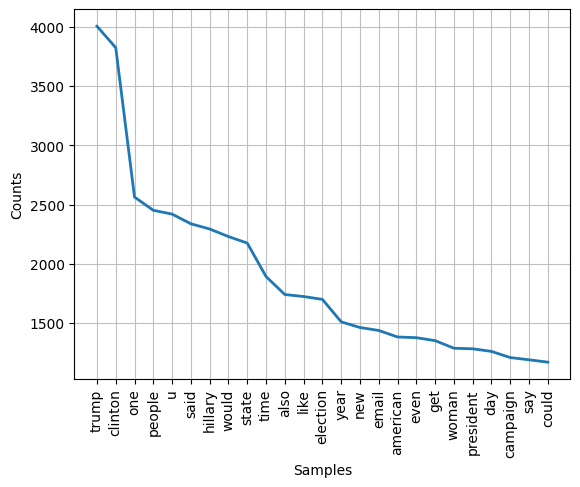

In [ ]:
# Count the frequency of words
all_words = [word for tokens in data['text_preprocessed'] if isinstance(tokens, str) for word in tokens.split()]
freq_dist = FreqDist(all_words)

if len(all_words) > 0:
    # Plot the most common words
    freq_dist.plot(25)

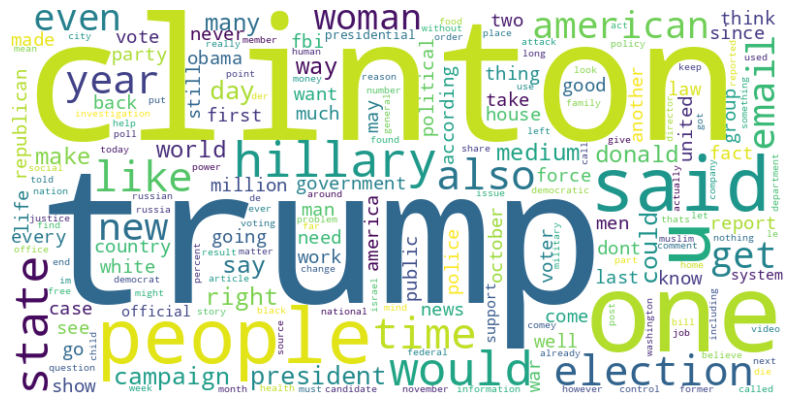

In [ ]:
 # Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Apply POS tagging
data['pos_tags'] = data['tokenized_text'].apply(pos_tag)

# Perform NER using ne_chunk
data['ner'] = data['pos_tags'].apply(ne_chunk)

# Define the grammar for chunking noun phrases
grammar = r"NP: {<DT>?<JJ>*<NN>}"

# Create a chunk parser using the grammar
chunk_parser = nltk.RegexpParser(grammar)

# Apply chunking to the POS tags of each sentence
data['chunked_text'] = data['pos_tags'].apply(lambda x: chunk_parser.parse(x))

# Print the chunked sentences
for chunked_sentence in data['chunked_text']:
    print(chunked_sentence)

# Function to extract entities from the NER results
def extract_entities(ner):
    entities = []
    for chunk in ner:
        if hasattr(chunk, 'label') and chunk.label() == 'NE':
            entities.append(' '.join(c[0] for c in chunk))
    return entities

# Apply the extract_entities function to extract entities from the NER results
data['entities'] = data['ner'].apply(extract_entities)

# Visualize the NER graphically
nlp = spacy.load('en_core_web_sm')
for entities in data['entities']:
    doc = ' '.join(entities)
    doc = nlp(doc)
    displacy.render(doc, style='ent', jupyter=True)

Streaming output truncated to the last 5000 lines.
  (NP supplemantry/NN)
  (NP note/NN)
  (NP lasha/NN)
  (NP darkmoon/NN)
  (NP transhumanist/NN)
  (NP depopulation/NN)
  (NP agenda/NN)
  far/RB
  worse/JJR
  (NP condition/NN)
  (NP hitler/NN)
  (NP clone/NN)
  (NP become/NN)
  (NP president/NN)
  (NP january/JJ plan/NN)
  far/RB
  worse/JJR
  cloning/VBG
  (NP hitler/NN)
  making/VBG
  (NP president/NN)
  (NP commander/NN)
  (NP chief/JJ day/NN)
  reckoning/VBG
  arrived/VBD
  (NP vid/JJ rebel/NN)
  never/RB
  said/VBD
  supported/VBN
  (NP donald/JJ trump/NN)
  liked/VBD
  wanted/JJ
  u/JJ
  go/NNS
  say/VBP
  (NP interested/JJ anger/NN)
  (NP bernie/NN)
  (NP sander/NN)
  (NP donald/NN)
  (NP trump/NN)
  (NP voter/NN)
  (NP election/NN)
  (NP night/NN)
  (NP bbc/NN)
  (NP reporter/NN)
  tried/VBD
  (NP explain/NN)
  (NP hillary/NN)
  lost/VBD
  (NP state/NN)
  (NP huge/JJ black/JJ vote/NN)
  (NP lot/NN)
  technically/RB
  advanced/JJ
  people/NNS
  (NP state/NN)
  (NP american/JJ 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:215: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Extracting text data and labels data from our DataFrame.


*   The text data is tokenized using Tokenizer class from TensorFlow
     python library.

*   The labels are encoded using LabelEncoder from scikit-learn python
     library.



In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

In [ ]:
# Perform label encoding on the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Split the data into training and testing sets
x_tn, x_tt, y_tn, y_tt = train_test_split(sequences, labels, test_size=0.2, random_state=42)

Using a source-based news dataset as a deep learning model for classification. Our model have used convolutional neural networks(CNN) and recurrent neural network (RNN) which process the textual and categorical features of the news articles.

In our CNN and RNN model, I have used the following steps -

1. Embedding layer - To handle textual data which convert words into numerical vectors.

2. 1D convolutional layer - To process a sequential model used in deep learning model.


3. Max pooling - It is used as downsampling operation.


4. LSTM layer - Long Short-Term Memory layer is added to capture the long-term dependencies and learn complex patterns in sequential data.


5. Dense layers with dropout - Dense layer is used to learn complex mapping wherein Dropout will help to prevent overfitting.
The output layer used softmax activation to provide predicted class probabilities.

Now the model is compiled with the sparse categorical cross-entropy loss function and the Adam optimizer.

It undergoes training using the training data and evaluation using the test data.

In [ ]:
# Define the deep learning model
mod_cnn = Sequential()

mod_cnn.add(Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim=100))

mod_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

mod_cnn.add(MaxPooling1D(pool_size=2))

mod_cnn.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

mod_cnn.add(Dense(units=64, activation='relu'))

mod_cnn.add(Dropout(0.5))

mod_cnn.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

# Compile the model
mod_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
mod_cnn.fit(x_tn, y_tn, validation_data=(x_tt, y_tt), epochs=10, batch_size=32)

# Evaluate the model
loss = mod_cnn.evaluate(x_tt, y_tt)
accuracy = mod_cnn.evaluate(x_tt, y_tt)

print("Calculated Loss:", loss)
print("Calculated Accuracy:", accuracy)

In [ ]:
# Drop rows with NaN values in the training data
train_data = train_data.dropna(subset=['text_preprocessed', 'label'])

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the training data
train_features = vectorizer.fit_transform(train_data['text_preprocessed'])

# Transform the testing data using the fitted vectorizer
test_features = vectorizer.transform(test_data['text_preprocessed'])

# Drop rows with NaN values in the testing data
test_data = test_data.dropna(subset=['text_preprocessed', 'label'])

# Create an AdaBoost classifier
boosting_model = AdaBoostClassifier()

# Train the model on the training features and labels
boosting_model.fit(train_features, train_data['label'])

# Get the predictions on the testing data
predictions = boosting_model.predict(test_features)

# Create a new column in the test_data dataframe for predicted labels
test_data['Predicted_Label'] = predictions

# Display the dataframe with predicted labels
test_data[['text_preprocessed', 'label', 'Predicted_Label']].head(10)

,text_preprocessed,label,Predicted_Label
305,november pm predicted donald trump victory ele...,Real,Real
1284,nili nathan posted friday october edt keywords...,Fake,Fake
368,kingdom energy minister say move would risk da...,Fake,Real
480,worst saudi economic slump yet come press tv e...,Fake,Fake
1538,iraq leader iraq semiautonomous kurdistan regi...,Real,Real
1675,last week expounded idea take time ponder emot...,Fake,Real
520,email democratic u vicepresidential nominee ti...,Fake,Fake
1983,print applaud integrity condemn selling allow ...,Fake,Real
1874,obama hillary deceit lie tried treason anyone ...,Fake,Fake
100,hillary clinton life sized gangster statue vis...,Fake,Fake


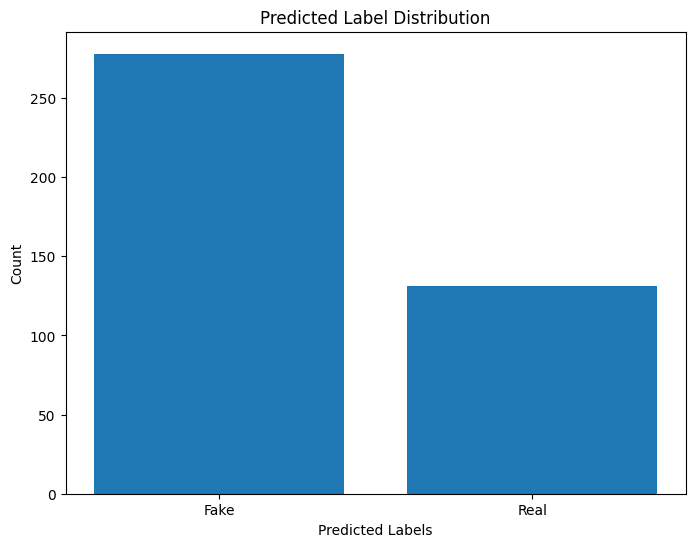

In [ ]:
# Count the occurrences of each predicted label
label_counts = test_data['Predicted_Label'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Predicted Label Distribution')
plt.show()

In [ ]:
# Predict the labels for the testing features
predictions = mod_cnn.predict(test_features)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_data['label'], predictions)
precision = precision_score(test_data['label'], predictions, pos_label='Real')
recall = recall_score(test_data['label'], predictions, pos_label='Real')
f1 = f1_score(test_data['label'], predictions, pos_label='Real')

print("Accuracy:", accuracy * 100, '%')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the necessary resources for sentiment analysis
nltk.download('vader_lexicon')

# Create a sentiment analyzer object
sentiment_analyzer = SentimentIntensityAnalyzer()

# Get the types of news present in the dataset
news_types = data['type'].unique()

# Ask the user for the type of news
news_type = input("Enter the type of news (bias, conspiracy, bs, satire, hate, junksci, state): ")

# Check if the entered news type is valid
while news_type not in news_types:
    print("Invalid type of news. Please try again.")
    news_type = input("Enter the type of news (bias, conspiracy, bs, satire, hate, junksci, state): ")

# Filter the data based on the chosen news type
filtered_data = test_data[test_data['type'] == news_type]

# Transform the recommendation features using the fitted vectorizer
recommendation_features = vectorizer.transform(filtered_data['text_preprocessed'])

# Predict the probabilities of being real news for recommendations
filtered_data['prob_real'] = boosting_model.predict_proba(recommendation_features)[:, 1]

# Add sentiment scores to each article
filtered_data['sentiment_score'] = filtered_data['text_preprocessed'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

# Convert sentiment scores to percentages
filtered_data['sentiment_score_percentage'] = filtered_data['sentiment_score'] * 100

# Sort recommendations based on the predicted probabilities of being real news
recommendations = filtered_data.sort_values('prob_real', ascending=False)

# Filter top 5 unbiased articles
top_recommendations = recommendations.head(5)

# Display top 5 unbiased recommendations with sentiment scores
for index, row in top_recommendations.iterrows():
    print("Title:", row['title'])
    print("Author:", row['author'])
    print("Sentiment Score: {:.2f}%".format(row['sentiment_score_percentage']))
    print("_______________________________________________")

In [ ]:
from textblob import TextBlob

# Get the new article as input
new_article = input("Enter the new article: ")

# Perform sentiment analysis using TextBlob
blob = TextBlob(new_article)
sentiment_score = blob.sentiment.polarity

# Determine sentiment type based on sentiment score
if sentiment_score > 0:
    sentiment_type = "Positive"
elif sentiment_score < 0:
    sentiment_type = "Negative"
else:
    sentiment_type = "Neutral"

# Output the sentiment score and sentiment type
print("Sentiment Score:", sentiment_score)
print("Sentiment Type:", sentiment_type)